The aim of this assignment is to perform customer segmentation 
using the K-Means clustering algorithm in order to better understand the 
different types of customers in a given dataset.

Dataset has the following attributes:
1. CustomerID: Unique ID for each customer
2. Gender: Male or Female
3. Age: Age of the customer
4. Annual Income (k$): Annual income of the customer in thousands of dollars
5. Spending Score (1-100): A score assigned by the mall based on customer 
behavior and spending nature (higher scores indicate higher spending)

Task1: Exploratory Data Analysis

In [ ]:
#Import libraries
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [ ]:
#load dataset
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv")

In [ ]:
#display first few rows
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#check for missing values
df.isnull().sum()
#no values are missing

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

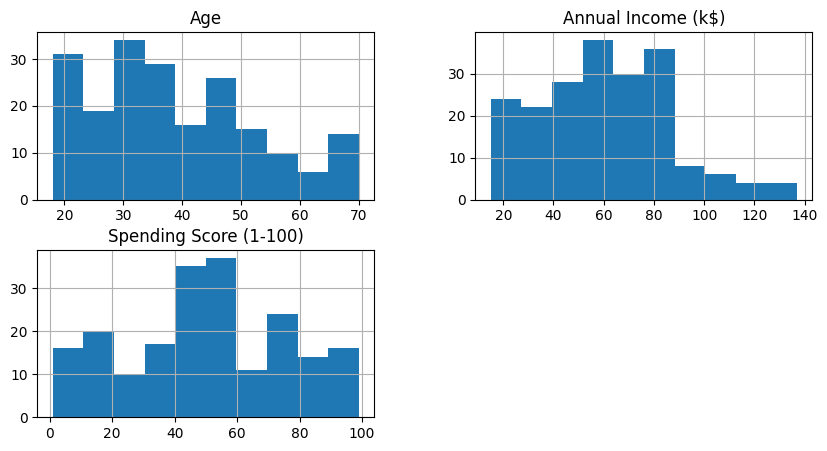

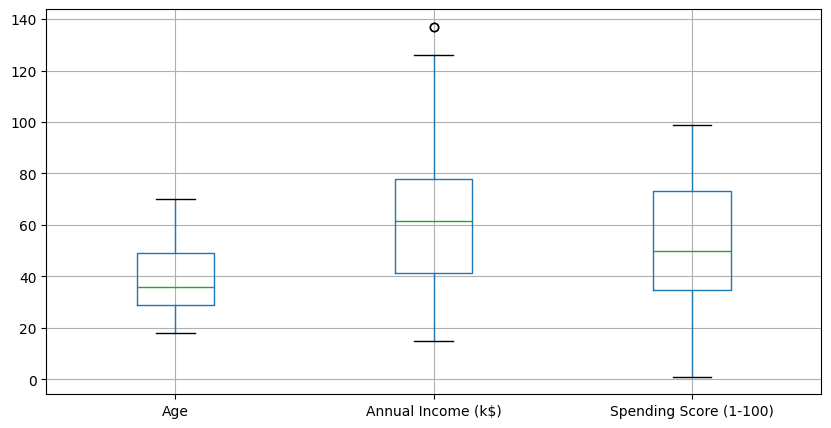

In [ ]:
# Visualize the distribution of features using histograms or boxplots
# create histograms of each column
dfnoCID = df.drop('CustomerID',axis=1)
dfnoCID.hist(figsize=(10, 5))
plt.show()

# create boxplots of each column
dfnoCID.boxplot(figsize=(10, 5))
plt.show()

In [ ]:
# calculate the 5th and 95th percentiles of column 'A'
percentiles = df['Annual Income (k$)'].quantile([0.05, 0.95])

# identify any values outside the 5th and 95th percentiles
outliers = df[(df['Annual Income (k$)'] < percentiles.loc[0.05]) | (df['Annual Income (k$)'] > percentiles.loc[0.95])]

# remove the outliers from the dataset
df = df[(df['Annual Income (k$)'] >= percentiles.loc[0.05]) & (df['Annual Income (k$)'] <= percentiles.loc[0.95])]

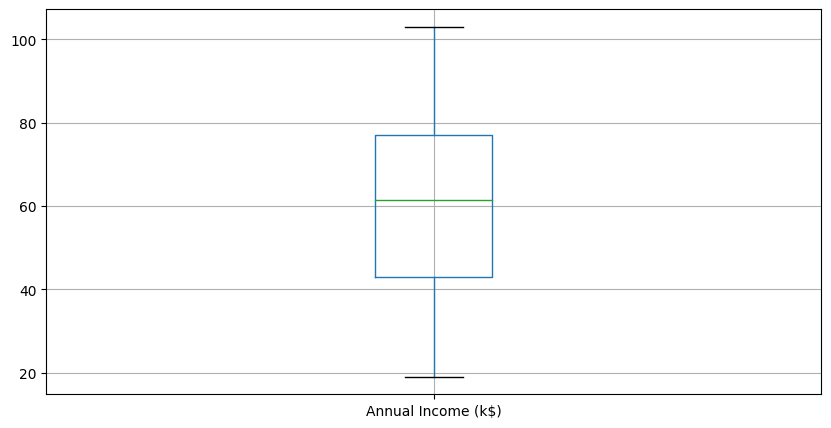

In [ ]:
# create boxplots for Annual Income - see if outliers were removed
df[['Annual Income (k$)']].boxplot(figsize=(10, 5))
plt.show()

In [ ]:
#KNN does not take categorical variables
# create a BinaryEncoder object and fit it to the 'Gender' column
# perform one-hot encoding using pd.get_dummies()
df_encoded = pd.get_dummies(df, columns=['Genre'])

# view the resulting encoded DataFrame
print(df_encoded)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
8             9   64                  19                       3   
9            10   30                  19                      72   
10           11   67                  19                      14   
11           12   35                  19                      99   
12           13   58                  20                      15   
..          ...  ...                 ...                     ...   
187         188   28                 101                      68   
188         189   41                 103                      17   
189         190   36                 103                      85   
190         191   34                 103                      23   
191         192   32                 103                      69   

     Genre_Female  Genre_Male  
8               0           1  
9               1           0  
10              0           1  
11              1           0  
12              1      

2. Prepare the data for clustering

a. Perform any necessary feature scaling 
(StandardScaler or MinMaxScaler)

In [ ]:
# scale the remaining columns using StandardScaler
from sklearn.preprocessing import StandardScaler

#create an instance of StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_encoded[['Annual Income (k$)', 'Spending Score (1-100)']])
scaled_data

b. Choose the appropriate features for 
clustering (you may start with 'Annual Income' and 'Spending Score') 

In [ ]:
#annual income is the selected feature
# Create a new DataFrame with only the selected features
clusterdf = pd.DataFrame(scaled_data, columns=['Annual Income', 'Spending Score'])
clusterdf.head()
              


,Annual Income,Spending Score
0,-1.853568,-1.879515
1,-1.853568,0.872137
2,-1.853568,-1.440846
3,-1.853568,1.948870
4,-1.808045,-1.400967


3.Implement k-means clustering

In [ ]:
# use the KMeans class from the sklearn.cluster module
#use the Silhouette Method to determine the optimal number of clusters
from sklearn.metrics import silhouette_score

# create an empty dictionary to store the silhouette scores for different number of clusters
silhouette_scores = {}

# create a range of number of clusters to test
for n_clusters in range(2, 11):
    
    # create a KMeans object with the given number of clusters
    kmeans = KMeans(n_clusters=n_clusters)
    
    # fit the KMeans model to the data
    kmeans.fit(clusterdf)
    
    # get the predicted cluster labels for each data point
    cluster_labels = kmeans.predict(clusterdf)
    
    # calculate the silhouette score for this clustering
    silhouette_avg = silhouette_score(clusterdf, cluster_labels)
    
    # add the silhouette score to the dictionary for this number of clusters
    silhouette_scores[n_clusters] = silhouette_avg

# find the number of clusters with the highest silhouette score
optimal_clusters = max(silhouette_scores, key=silhouette_scores.get)

print(f"The optimal number of clusters is {optimal_clusters} with a silhouette score of {silhouette_scores[optimal_clusters]}")
#In the 9th line of the output it says: The optimal number of clusters is 5 with a silhouette score of 0.5672654966819106

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

The optimal number of clusters is 5 with a silhouette score of 0.5672654966819106


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

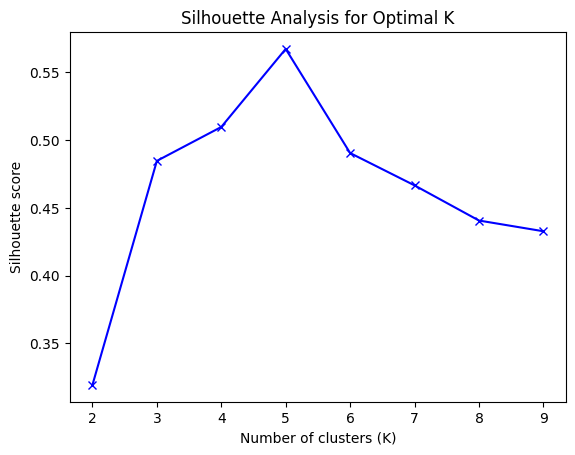

In [ ]:
#plot graph to show optimal K with Silhouette Method
range_n_clusters = range(2, 10)
silhouette_avg = []
for num_clusters in range_n_clusters:
    # Initialize KMeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(clusterdf)
    cluster_labels = kmeans.labels_
    # Compute silhouette score
    silhouette_avg.append(silhouette_score(clusterdf, cluster_labels))
    
# Plot silhouette scores for each value of K
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()

3.c.Train the KMeans model with the optimal number of 
clusters

In [ ]:
#Create a KMeans object with the optimal number of clusters
kmeans = KMeans(n_clusters=5)

# Train the KMeans model on the scaled data
kmeans.fit(clusterdf)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Print the cluster centers
print(kmeans.cluster_centers_)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[-0.23225743 -0.00417907]
 [ 1.0260717   1.27776307]
 [ 1.04382175 -1.25083417]
 [-1.45397936  1.14242764]
 [-1.42709165 -1.18058292]]


3.d.  Obtain the cluster assignments for each data point

In [ ]:
# Get the cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Print the cluster assignments for the first 10 data points
print(cluster_assignments[:10])

[4 3 4 3 4 3 4 3 4 3]


4. Visualize and analyze the clusters

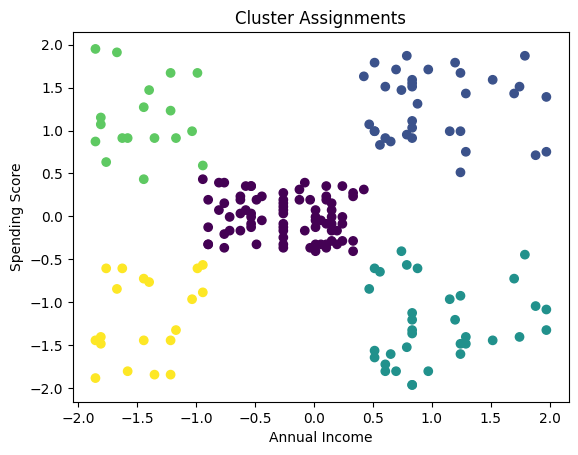

In [ ]:
# Create a scatter plot of the selected features, colored by cluster assignment
plt.scatter(clusterdf['Annual Income'], clusterdf['Spending Score'], c=cluster_assignments)

# Add axis labels and a title
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Cluster Assignments')
plt.show()

4b. Interpret the clusters and provide a brief description of each cluster

The yellow cluster represents people who have low annual income and spend within their means as their spending score is low, the green cluster shows people who shop above their annual income since their spending score is high, the purple cluster shows people whose spending habits are just in the middle, they don't have the highest of incomes and don't spend too much either, the teal group are buyers who have high incomes but choose to save, and the blue group are people who have income and like to spend.



5. Write a report summarizing your findings:

 a. Describe the dataset and its attributes:
The dataset has 4 attributes (exlcuding the identifier CustomerID)
Gender: Male or Female (see if theres more male then female)
Age: Age of the customer (see the average age)
Annual Income (k$): Annual income of the customer in thousands of dollars (see average)
Spending Score (1-100): A score assigned by the mall based on customer 
behavior and spending nature (higher scores indicate higher spending) - (see average)

 b. Detail the steps taken for data preprocessing, feature selection, and 
scaling

  Data preprocessing:
Looked at the first rows of data, did histogram and boxplots on the 4 features excluding customer ID, removed outliers from the Income feature, and encoded the gender "genre" feature.

  Feature selection: Income and Spending Score features from the dataset to perform K means clustering. By clustering customers based on their Income and Spending Score, businesses can identify different customer segments with distinct spending behaviors and develop targeted marketing strategies to meet their needs and preferences.

  Scaling: The selected features, spending score and annual income, and they were then scaled using StandardScaler from scikit-learn. It ensures that the clustered features are on the same scale and have equal importance during clustering.
  
 c. Explain the process of determining the optimal number of clusters: 
 To obtain the optimal number of clusters I used the silhouette method. I created a function and for loop to display the optimal number as well as plotting a graph to get the optimal score based off clusters and got 5, then used that to train the model.


 d. Describe the clusters and their characteristics 
There are 5 clusters created from the Silhouette methods. The yellow cluster represents people who have low annual income and spend within their means as their spending score is low, the green cluster shows people who shop above their annual income since their spending score is high, the purple cluster shows people whose spending habits are just in the middle, they don't have the highest of incomes and don't spend too much either, the teal group are buyers who have high incomes but choose to save, and the blue group are people who have income and like to spend.


 e. Discuss any insights or 
recommendations based on your analysis.

Based off the clusters, low income and shop within means, low income and shop above means, middle income and middle spending score, high income and low spending score, and high income high spending score I would reccomend targeting the clusters the following way.
1. Low income and shop within means, these people probably only shop during sales or when they really need something so I would reccomend offering them sales about once a month or so without over saturating the list as they will probably not buy that often anyway.
2. Low income and shopping above means, I would try to use other algorithms to determine their preferences and other buying behavior, I know that they like to spend a lot even though their income is not high, so I would communicate messages reccomending products I think they would like and be less worried about saturating this group of customers with communications.
3. Middle income and middle spending, I would think they spend when they need something or find something an appropriate price. Because they have higher income and do have average spending power I would reccomend a combinations of the methods for communication of the two above groups.
4. High income and low spending score, I would consider these people to be frugal, and know they will probably only spend if there is a really good deal or absolutely need something. I would communicate with them when there are sales that "Are too good" for even these people to pass up.
5. High income and high spending score are people who like to spend the money they have and are probably into brands and enjoy shopping. I would target them similarly as the first group as we know they are inclined to spend more and have the means to do so.